<a href="https://colab.research.google.com/github/Ivanpillow/Clasificacion-Inteligente-de-Datos/blob/main/Hands-on%203%3A%20Kmeans%20Notebook%20(Tutorial)/Hands_on_3_Kmeans_Notebook_DIHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hans-On 3 K means Notebook

Nombre: Diego Iván Hernández Muñoz

Profesor: Jose Antonio Aviña Mendez

Materia: Clasificacion inteligente de datos

# 1.1 Fundamentos sobre la clasificación K means

K-Means es un algoritmo de clustering no supervisado que divide datos en K grupos o clusters según su similitud y sin el uso de etiquetas.


Primero se especifica el número de clusters deseados (k). Cada punto se asigna al cluster cuyo centroide (media del grupo) está más cercano, mediante el calculo de su distancia entre cada apunto y cada centroide. Así que este algoritmo de manera iterativa recalcula los centroides de cada cluster como la media de todos los puntos del cluster

# 1.2 Modelo matemático del K means

Se consta de tres pasos para conocer el flujo del algoritmo:

*   Inicialización: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos.
*   Asignación de objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.
*   Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Al finalizar estos pasos se repiten el 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.


$$\underset{S}{\arg \min} \sum_{i=1}^{k} \sum_{x_j \in S_i} \|x_j - \mu_i\|^2$$

*   **arg min**: Hace que se busque la mejor partición ($S$) de los datos para minimizar el valor total de la expresión.
*  **k**: Es el número de clusteres.
*   $S = \{S_1, \ldots, S_k\}$: es la partición del conjunto de datos, sus elementos son los objetos $x_j$ representados por vectores, donde cada uno de sus elementos representa una característica o atributo.
*   $x_j$: son puntos de datos.
*   $\mu_i$: centro de todos los puntos de datos en el clúster.
*   $\|x_j - \mu_i\|$: con ello se calcula la distancia euclidiana al cuadrado entre el punto $x$ y el centroide.





# 1.3 Descripción de librerias

In [27]:
import pandas as pd # Visualización de datos y creación de gráficos
import seaborn as sn # Lo utilicé solo para un scatterplot
import numpy as np
from sklearn.model_selection import train_test_split # Division del modelo en prueba y entrenamiento
from sklearn import preprocessing
import matplotlib.pyplot as plt # Visualización de datos y creación de gráficos
from sklearn.preprocessing import StandardScaler # Se escalan los datos para darles la misma importancia
from sklearn.cluster import KMeans # Se importa el modelo del algoritmo KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score # Puntaje con accuracy, la matriz de confusión y silhouette_score para medir la separación y cohesión de los clusters.

# 1.4 Pipeline

## 1.4.1 Preprocesamiento de datos

Estadísticas:

         longitude    latitude  median_house_value
count  3000.000000  3000.00000          3000.00000
mean   -119.589200    35.63539        205846.27500
std       1.994936     2.12967        113119.68747
min    -124.180000    32.56000         22500.00000
25%    -121.810000    33.93000        121200.00000
50%    -118.485000    34.27000        177650.00000
75%    -118.020000    37.69000        263975.00000
max    -114.490000    41.92000        500001.00000




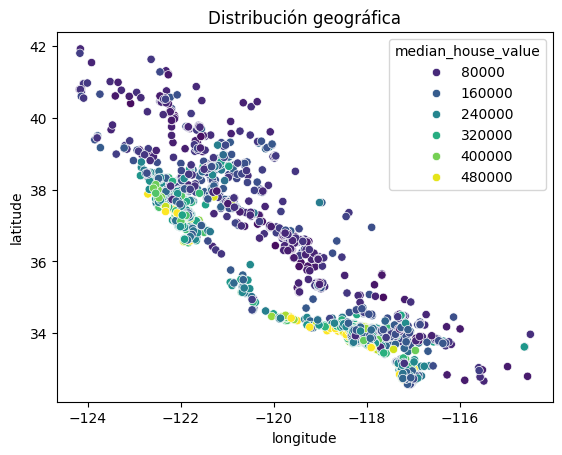

In [28]:
cal_data = pd.read_csv('/content/sample_data/california_housing_test.csv', usecols = ['longitude','latitude','median_house_value'])

print("Estadísticas:\n")
print(cal_data.describe()) # Estadisticas del dataset
print("\n")

# Visualización previa de los datos con un scatter plot
sn.scatterplot(x = 'longitude', y = 'latitude', data = cal_data, hue = 'median_house_value', palette='viridis')
plt.title('Distribución geográfica')
plt.show()

## 1.4.2 Normalización

Gracias al uso de la fórmula de distancia euclidiana, es necesario normalizar las variables para que ninguna domine el proceso.


In [29]:
# División del dataset en entrenamiento y prueba
X_train, X_test = train_test_split(cal_data, test_size=0.3, random_state=42)

# Normalización de los datos
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

print("Ya están normalizados bro")

Ya están normalizados bro


## 1.4.2 Entrenamiento del modelo

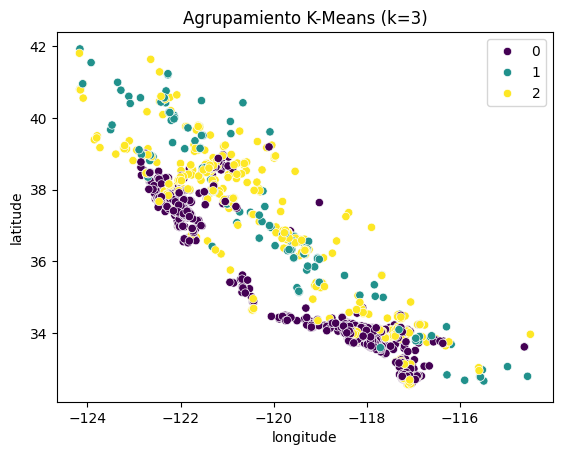


silhouette Score del modelo: 0.584


In [30]:
# Creación y entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto') # Se eligieron 3 cluster para las pruebas
kmeans.fit(X_train_norm)

# Asignación de etiquetas (clusters)
labels = kmeans.labels_

# Visualización del agrupamiento
sn.scatterplot(x=X_train['longitude'], y=X_train['latitude'], hue=labels, palette='viridis')
plt.title("Agrupamiento K-Means (k=3)")
plt.show()

# Evaluación con Silhouette Score
silhouette = silhouette_score(X_train_norm, labels)
print(f"\nsilhouette Score del modelo: {silhouette:.3f}")

Sihouette_score mide qué tan bien definidos están los clústeres creados, como que tan juntos estan los grupos dentro de un mismo cluster y que tan separadosestan los grupos entre si.

## 1.4.3 Predicción

In [31]:
def predecir_cluster(latitud, longitud, valor):
    nuevo = np.array([[latitud, longitud, valor]])
    nuevo_norm = preprocessing.normalize(nuevo)
    cluster_predicho = kmeans.predict(nuevo_norm)
    print(f"Los valores pertenecen al grupo: {cluster_predicho[0]}")

# Ejemplo de predicción
predecir_cluster(-117, 36.5, 80000)
predecir_cluster(-120, 34.3, 470000)

Los valores pertenecen al grupo: 1
Los valores pertenecen al grupo: 0


## 1.4.4 Evaluación del modelo

Matriz de Confusión simulada:
 [[179  33  90]
 [183  24  93]
 [184  26  88]]

Precisión simulada del modelo: 0.32


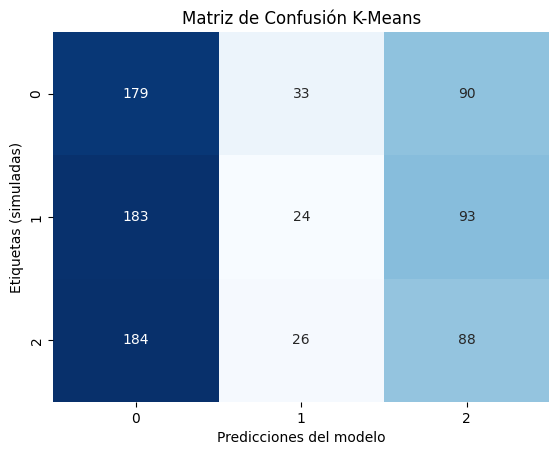

In [32]:
# Predicción sobre el conjunto de prueba
pred_test = kmeans.predict(X_test_norm)

# Para evaluación, se reasignan los clusters según su similitud (simulación de etiquetas)
true_labels = np.random.randint(0, 3, size=len(pred_test))

# Matriz de confusión
mat_conf = confusion_matrix(true_labels, pred_test)
print("Matriz de Confusión simulada:\n", mat_conf)

# Accuracy estimada (simulada)
acc = accuracy_score(true_labels, pred_test)
print(f"\nPrecisión simulada del modelo: {acc:.2f}")

sn.heatmap(mat_conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión K-Means")
plt.xlabel("Predicciones del modelo")
plt.ylabel("Etiquetas (simuladas)")
plt.show()

La precisión del modelo K-Means en este caso (35) es baja pero normal debido a que es aplicado a un problema no supervisado, y como no existen etiquetas verdaderasque representen clases reales.

Como la accuracy no mide bien un modelo de clustering, por ello utilicé Silhouette Score para mayor separación.

# Bibliografía

*   Babitz, K. (2018, July 5). Introduction to k-Means Clustering with scikit-learn in Python. Datacamp.com; DataCamp. https://www.datacamp.com/tutorial/k-means-clustering-python
*   kmeans. (2025). Unioviedo.es. https://www.unioviedo.es/compnum/laboratorios_py/new/kmeans.html
*   Ramírez, L. (2024, October 30). Algoritmo k-means: ¿Qué es y cómo funciona? Thinking for Innovation. https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/
*   scikit-learn. (2019). sklearn.cluster.KMeans — scikit-learn 0.21.3 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


